In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os
import pickle
import numpy as np
import torch
import norse
import aedat
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange
import tonic
import tonic.transforms as transforms

<IPython.core.display.Javascript object>

## Load and Plot Data

In [19]:
TIME_FACTOR = 0.9
SPATIAL_FACTOR = 0.75
DATA_PATH = "../data/"
DOWNLOAD = False

<IPython.core.display.Javascript object>

In [29]:
transform = tonic.transforms.Compose(
    [
        transforms.Downsample(time_factor=TIME_FACTOR, spatial_factor=SPATIAL_FACTOR),
        transforms.ToSparseTensor(merge_polarities=True),
    ]
)

target_transform = tonic.transforms.ToOneHotEncoding(11)

trainset = tonic.datasets.DVSGesture(
    save_to="../data",
    download=DOWNLOAD,
    train=True,
)
testset = tonic.datasets.DVSGesture(
    save_to="../data",
    download=DOWNLOAD,
    transform=transform,
    train=False,
)

<IPython.core.display.Javascript object>

In [31]:
trainset[0][0]

array([[6.700000e+01, 9.400000e+01, 1.000000e+00, 1.000000e+01],
       [6.700000e+01, 9.400000e+01, 1.000000e+00, 1.100000e+01],
       [4.600000e+01, 8.700000e+01, 1.000000e+00, 1.200000e+01],
       ...,
       [6.700000e+01, 1.090000e+02, 0.000000e+00, 6.644647e+06],
       [7.000000e+01, 1.060000e+02, 0.000000e+00, 6.644648e+06],
       [3.000000e+00, 4.800000e+01, 0.000000e+00, 6.644670e+06]])

<IPython.core.display.Javascript object>

In [34]:
print(f"length of trainset : {len(trainset)}")
print(f"length of testset : {len(testset)}")

events = trainset[0][0]
print(f"events shape: {events.shape}")

no_classes = len(trainset.classes)
print(f"\nnumber of classes: {no_classes}")
trainset.classes

length of trainset : 1077
length of testset : 264
events shape: (440860, 4)

number of classes: 11


['hand_clapping',
 'right_hand_wave',
 'left_hand_wave',
 'right_arm_clockwise',
 'right_arm_counter_clockwise',
 'left_arm_clockwise',
 'left_arm_counter_clockwise',
 'arm_roll',
 'air_drums',
 'air_guitar',
 'other_gestures']

<IPython.core.display.Javascript object>

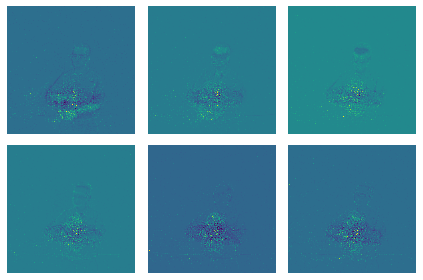

<IPython.core.display.Javascript object>

In [35]:
tonic.utils.plot_event_grid(events, trainset.ordering, axis_array=(2, 3))